In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from tabulate import tabulate

# Plot Mossbauer Data

In [102]:
datapoints = pd.read_csv("mossbauer-mode-peaks-0123.csv",header=19)
counts = datapoints['Counts'].tolist()
channels = datapoints['Channel'].tolist()

In [103]:
np.mean(counts)

17688.54296875

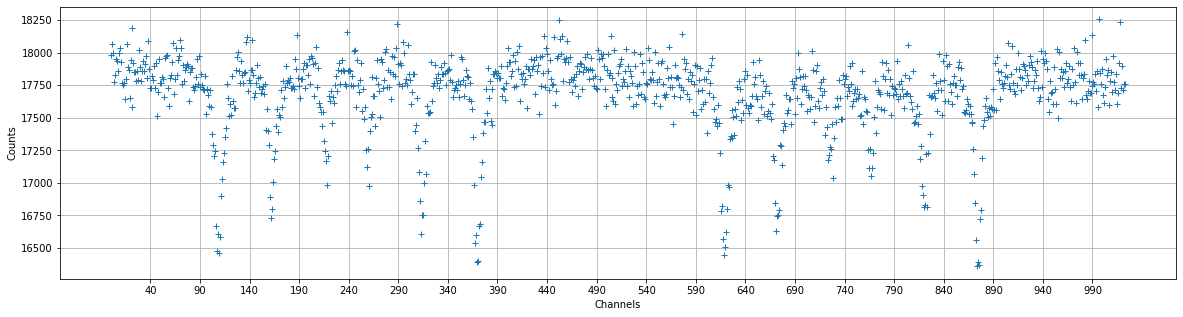

In [3]:
plt.figure(figsize=(20,5))
plt.plot(channels, counts,'+')
plt.ylabel('Counts')
plt.xlabel('Channels')
#plt.ylim(10000,20000)
plt.grid()
plt.xticks(np.arange(40, 1024, step=50))
plt.show()

# Convert Channels to Energy Levels

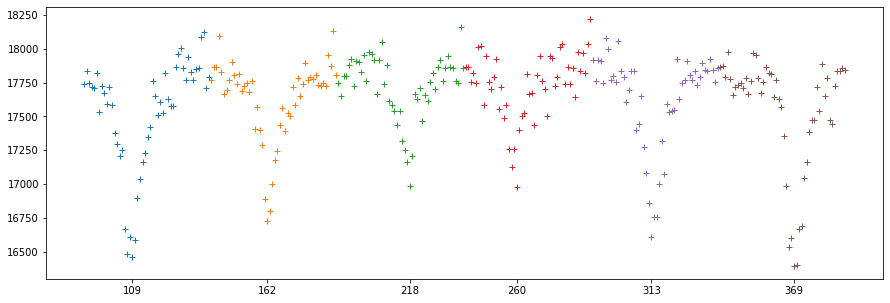

[16461, 16727, 16986, 16976, 16609, 16390]


In [4]:
plt.figure(figsize=(15,5))
i=90
peak_channel_list=[]
peak_counts_list=[]
while i<390:
    plt.plot(channels[i:i+50],counts[i:i+50],'+')
    peak_channel_list.append(np.argmin(counts[i:i+50])+i)
    peak_counts_list.append(min(counts[i:i+50]))
    i=i+50
plt.xticks(peak_channel_list)
plt.show()
print(peak_counts_list)

In [5]:
counts[107]

16479

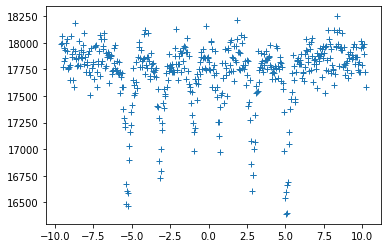

In [6]:
plt.plot(np.linspace(-9.59,10.22,500),counts[0:500],'+')

In [7]:
new_channels= np.linspace(-9.59,10.22,500)

In [8]:
len(new_channels)

500

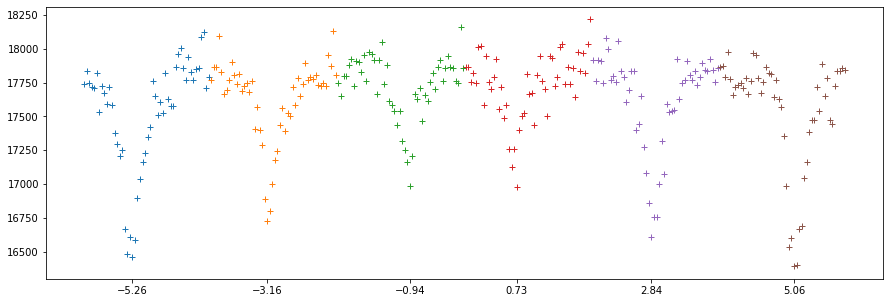

In [9]:
plt.figure(figsize=(15,5))
i=90
peak_list=[]
peak_counts_list=[]
while i<390:
    plt.plot(new_channels[i:i+50],counts[i:i+50],'+')
    peak_list.append(new_channels[np.argmin(counts[i:i+50])+i])
    i=i+50
plt.xticks(peak_list)
plt.show()

In [10]:
energy_channels = new_channels*(14.4)/(3*10**8)

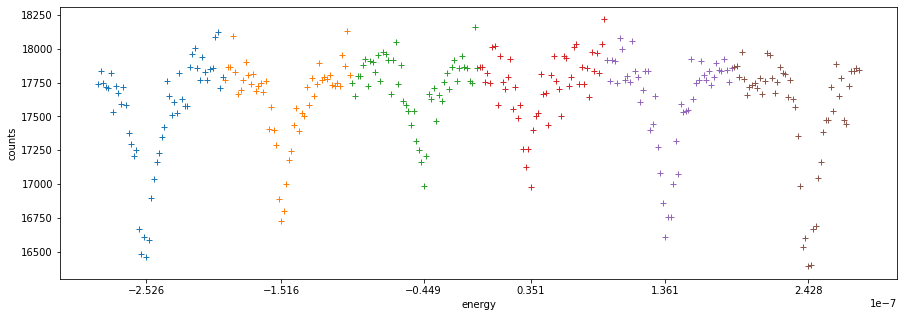

In [11]:
plt.figure(figsize=(15,5))
i=90
peak_energy_list=[]
peak_counts_list=[]
while i<390:
    plt.plot(energy_channels[i:i+50],counts[i:i+50],'+')
    peak_energy_list.append(energy_channels[np.argmin(counts[i:i+50])+i])
    i=i+50
plt.xticks(peak_energy_list)
plt.xlabel('energy')
plt.ylabel('counts')
plt.show()

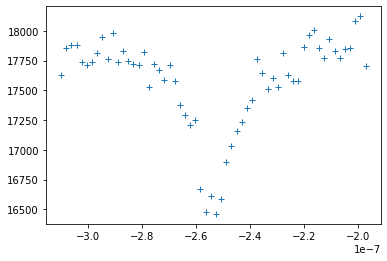

In [12]:
plt.plot(energy_channels[109-30:109+30],counts[109-30:109+30],'+')

# Gaussian Fit

In [13]:
def guess_gaussian(x, mu, sigma, amp, bg):
    return bg+amp*np.exp(((x-mu)/sigma)**2 /(-2))/((2*np.pi)**(0.5)*sigma)

In [14]:
def gaussian_fit(energy_channels = energy_channels, counts = counts):
    # initialize
    plt.figure(figsize=(15,5))
    mean_list = []
    sd_list = []
    background = np.mean(counts)
    
    # iterate around each peak
    for i_peak in peak_channel_list:
        # initialize
        xdata = np.array(energy_channels[i_peak-30:i_peak+30])
        ydata = np.array(counts[i_peak-30:i_peak+30])
        mean = sum(xdata * ydata) / sum(ydata)
        sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
        amplitude = min(ydata)-background

        # curve fit
        popt, pcov = curve_fit(guess_gaussian, xdata, ydata, p0=[mean, sdeviation, amplitude, background])
        
        # plot
        plt.plot(xdata, guess_gaussian(xdata, *popt), label='$\sigma$ = '+str(popt[1]))
        plt.plot(xdata, ydata,'+')
        
        # record mean and standard deviation
        mean_list.append(popt[0])
        sd_list.append(popt[1])

    plt.xticks(mean_list)
    plt.xlabel('energy')
    plt.ylabel('counts')
    plt.legend()
    plt.show()
    return mean_list, sd_list

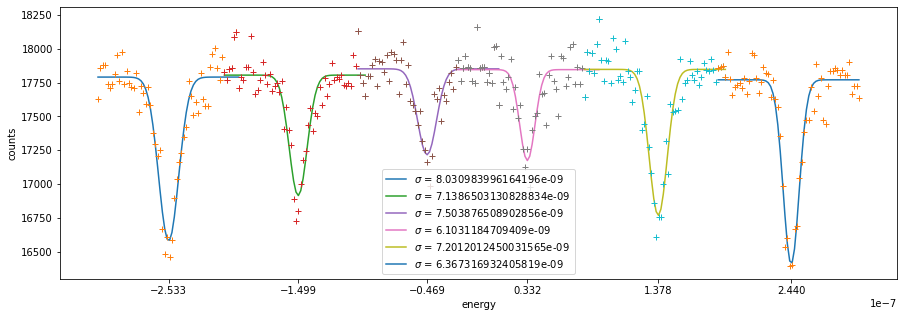

([-2.533287627047309e-07,
  -1.4985901566594566e-07,
  -4.690583570224664e-08,
  3.3218056153504556e-08,
  1.3779009292107544e-07,
  2.4400755989141913e-07],
 [8.030983996164196e-09,
  7.1386503130828834e-09,
  7.503876508902856e-09,
  6.1031184709409e-09,
  7.2012012450031565e-09,
  6.367316932405819e-09])

In [15]:
gaussian_fit()

# Gaussian Fit without Background

In [101]:
background = np.mean(counts)
counts_no_background = [background if elt > background else elt for elt in counts]
print(background)

17688.54296875


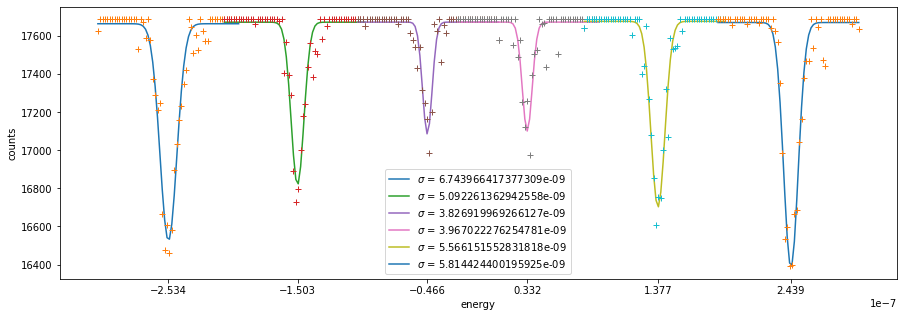

([-2.5340033257783234e-07,
  -1.5028825004213429e-07,
  -4.658718121049545e-08,
  3.322223907835251e-08,
  1.3765659863394738e-07,
  2.439021813976062e-07],
 [6.743966417377309e-09,
  5.092261362942558e-09,
  3.826919969266127e-09,
  3.967022276254781e-09,
  5.566151552831818e-09,
  5.814424400195925e-09])

In [17]:
gaussian_fit(energy_channels, counts_no_background)

# Many Gaussian Fit

In [18]:
def many_gaussian(x, bg, mu0, mu1, mu2, mu3, mu4, mu5, sigma0, sigma1, sigma2, sigma3, sigma4, sigma5, amp0, amp1, amp2, amp3, amp4, amp5):
    return bg+amp0*np.exp(((x-mu0)/sigma0)**2 /(-2))/((2*np.pi)**(0.5)*sigma0) \
            +amp1*np.exp(((x-mu1)/sigma1)**2 /(-2))/((2*np.pi)**(0.5)*sigma1) \
            +amp2*np.exp(((x-mu2)/sigma2)**2 /(-2))/((2*np.pi)**(0.5)*sigma2) \
            +amp3*np.exp(((x-mu3)/sigma3)**2 /(-2))/((2*np.pi)**(0.5)*sigma3) \
            +amp4*np.exp(((x-mu4)/sigma4)**2 /(-2))/((2*np.pi)**(0.5)*sigma4) \
            +amp5*np.exp(((x-mu5)/sigma5)**2 /(-2))/((2*np.pi)**(0.5)*sigma5)

In [76]:
def many_gaussian_fit(energy_channels = energy_channels, counts = counts):
    # initialize
    plt.figure(figsize=(15,5))
    mean_list = []
    sdeviation_list = []
    amp_list = []
    background = np.mean(counts)
    
    # iterate around each peak
    for i_peak in peak_channel_list:
        # initialize
        xdata = np.array(energy_channels[i_peak-30:i_peak+30])
        ydata = np.array(counts[i_peak-30:i_peak+30])
        mean = sum(xdata * ydata) / sum(ydata)
        sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
        amplitude = min(ydata)-background
        
        # record test parameters
        mean_list.append(mean)
        sdeviation_list.append(sdeviation)
        amp_list.append(amplitude)
    
    # curve fit
    popt, pcov = curve_fit(many_gaussian, np.array(energy_channels[0:500]), np.array(counts[0:500]), \
                    p0=[background, *mean_list, *sdeviation_list, *amp_list])

    # plot
    # squareroot error for counts
    plt.errorbar(energy_channels[0:500], counts[0:500], yerr = np.sqrt(counts[0:500]), fmt='.r', ecolor='c', elinewidth = 1, capsize=2)
    plt.plot(energy_channels[0:500], many_gaussian(energy_channels[0:500], *popt), color='b')
    
    # i=2
    # for i_peak in peak_channel_list:
    #     xdata = np.array(energy_channels[i_peak-30:i_peak+30])
    #     ydata = np.array(counts[i_peak-30:i_peak+30])
    #     plt.errorbar(xdata, ydata, yerr = popt[i], xerr = None, fmt = '.', ecolor = 'r', elinewidth = 1)
    #     i = i+3
        
    plt.xticks(mean_list)
    plt.xlabel('energy shift')
    plt.ylabel('counts')
    #plt.legend()
    plt.show()
    return popt

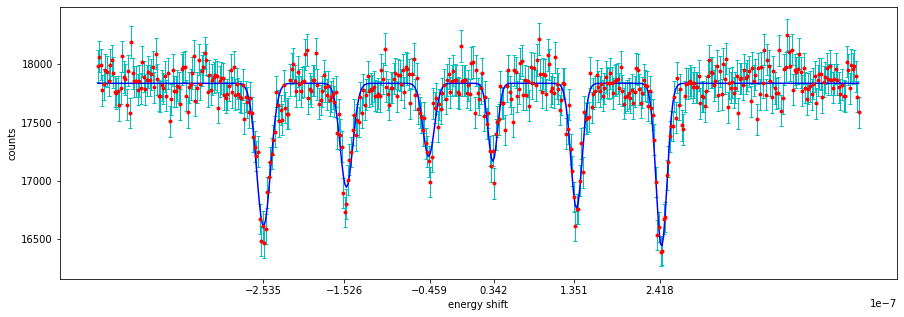

array([ 1.78363841e+04, -2.53287365e-07, -1.49724985e-07, -4.69459287e-08,
        3.31999660e-08,  1.37782739e-07,  2.44083995e-07,  8.71038205e-09,
        7.84220323e-09,  7.17812910e-09,  5.89404693e-09,  7.06437461e-09,
        6.87490787e-09, -2.68053651e-05, -1.75669133e-05, -1.13079590e-05,
       -9.92106919e-06, -1.90414483e-05, -2.41844831e-05])

In [77]:
many_gaussian_fit()

In [98]:
background = 1+np.mean(counts)
counts_no_background = [background if elt > background else elt for elt in counts]

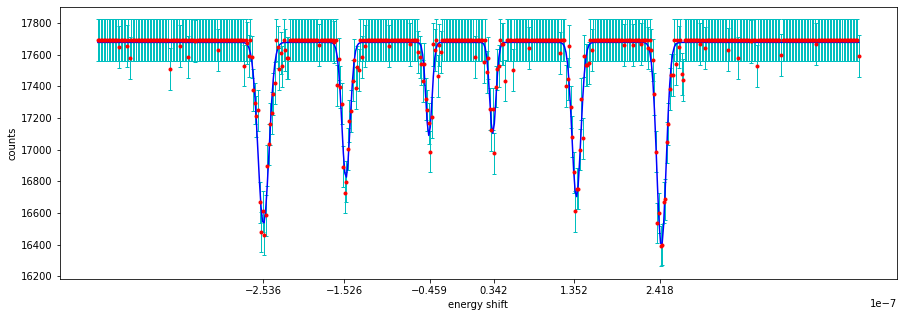

array([ 1.76771537e+04, -2.53391539e-07, -1.50280469e-07, -4.66069449e-08,
        3.32207482e-08,  1.37656172e-07,  2.43907239e-07,  6.85638354e-09,
        5.13749542e-09,  3.88028881e-09,  3.99628108e-09,  5.55671149e-09,
        5.84650878e-09, -1.97123207e-05, -1.10235895e-05, -5.72313632e-06,
       -5.75637761e-06, -1.35979397e-05, -1.88968730e-05])

In [99]:
many_gaussian_fit(counts=counts_no_background)

# Lorentzian Fit

In [23]:
def guess_lorentzian(x, mu, gamma, amp, bg):
    return bg + (amp / np.pi) * (gamma / 2) / ((x - mu)**2 + (gamma / 2)**2)

In [24]:
def lorentzian_fit():
    # initialize
    plt.figure(figsize=(15,5))
    mean_list = []
    half_width_list = []
    background = np.mean(counts)
    
    # iterate around each peak
    for i_peak in peak_channel_list:
        # initialize
        xdata = np.array(energy_channels[i_peak-30:i_peak+30])
        ydata = np.array(counts[i_peak-30:i_peak+30])
        mean = sum(xdata * ydata) / sum(ydata)
        sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
        amplitude = min(ydata)-background

        # curve fit
        popt, pcov = curve_fit(guess_lorentzian, xdata, ydata, p0=[mean, sdeviation, amplitude, background])
        
        # plot
        plt.plot(xdata, guess_lorentzian(xdata, *popt), label='$\Gamma$ = '+str(popt[1]))
        plt.plot(xdata, ydata,'+')
        
        # record mean and standard deviation
        mean_list.append(popt[0])
        half_width_list.append(popt[1])

    plt.xticks(mean_list)
    plt.xlabel('energy')
    plt.ylabel('counts')
    plt.legend()
    plt.show()
    return mean_list, half_width_list

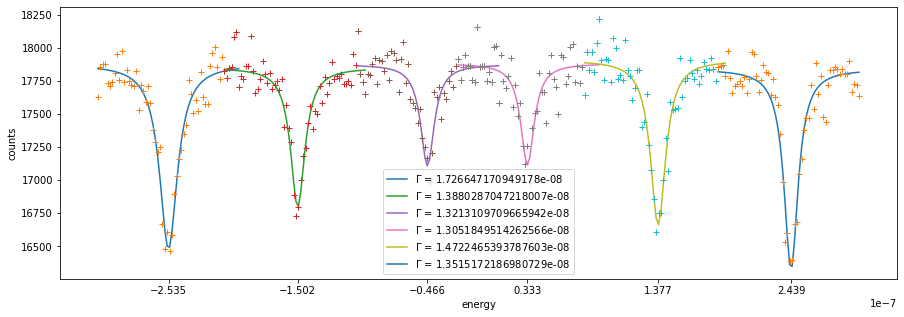

([-2.534546226036081e-07,
  -1.5019820529087163e-07,
  -4.658663959613484e-08,
  3.3319194378362475e-08,
  1.3766076981461844e-07,
  2.438938169619189e-07],
 [1.726647170949178e-08,
  1.3880287047218007e-08,
  1.3213109709665942e-08,
  1.3051849514262566e-08,
  1.4722465393787603e-08,
  1.3515172186980729e-08])

In [25]:
lorentzian_fit()

In [26]:
# def test_more_lorentzian(x, bg, mu, gamma, amp):
#     return bg + (amp[0] / np.pi) * (gamma[0] / 2) / ((x - mu[0])**2 + (gamma[0] / 2)**2) \
#             + (amp[1] / np.pi) * (gamma[1] / 2) / ((x - mu[1])**2 + (gamma[1] / 2)**2) \
#             + (amp[2] / np.pi) * (gamma[2] / 2) / ((x - mu[2])**2 + (gamma[2] / 2)**2) \
#             + (amp[3] / np.pi) * (gamma[3] / 2) / ((x - mu[3])**2 + (gamma[3] / 2)**2) \
#             + (amp[4] / np.pi) * (gamma[4] / 2) / ((x - mu[4])**2 + (gamma[4] / 2)**2) \
#             + (amp[5] / np.pi) * (gamma[5] / 2) / ((x - mu[5])**2 + (gamma[5] / 2)**2)

In [27]:
def more_lorentzian(x, bg, mu0, mu1, mu2, mu3, mu4, mu5, gamma0, gamma1, gamma2, gamma3, gamma4, gamma5, amp0, amp1, amp2, amp3, amp4, amp5):
    return bg + (amp0 / np.pi) * (gamma0 / 2) / ((x - mu0)**2 + (gamma0 / 2)**2) \
            + (amp1 / np.pi) * (gamma1 / 2) / ((x - mu1)**2 + (gamma1 / 2)**2) \
            + (amp2 / np.pi) * (gamma2 / 2) / ((x - mu2)**2 + (gamma2 / 2)**2) \
            + (amp3 / np.pi) * (gamma3 / 2) / ((x - mu3)**2 + (gamma3 / 2)**2) \
            + (amp4 / np.pi) * (gamma4 / 2) / ((x - mu4)**2 + (gamma4 / 2)**2) \
            + (amp5 / np.pi) * (gamma5 / 2) / ((x - mu5)**2 + (gamma5 / 2)**2)

In [73]:
def more_lorentzian_fit(energy_channels = energy_channels[0:500], counts = counts[0:500]):
    # initialize
    plt.figure(figsize=(15,5))
    mean_list = []
    half_width_list = []
    amp_list = []
    background = np.mean(counts)
    
    # iterate around each peak
    for i_peak in peak_channel_list:
        # initialize
        xdata = np.array(energy_channels[i_peak-30:i_peak+30])
        ydata = np.array(counts[i_peak-30:i_peak+30])
        mean = sum(xdata * ydata) / sum(ydata)
        sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
        amplitude = min(ydata)-background
        
        # record test parameters
        mean_list.append(mean)
        half_width_list.append(sdeviation)
        amp_list.append(amplitude)
    
    # curve fit
    popt, pcov = curve_fit(more_lorentzian, np.array(energy_channels[0:500]), np.array(counts[0:500]), \
                    p0=[background, *mean_list, *half_width_list, *amp_list])

    # plot
    # squareroot error for counts
    plt.errorbar(energy_channels[0:500], counts[0:500], yerr = np.sqrt(counts[0:500]), fmt='.r', ecolor='c', elinewidth = 1, capsize=2)
    plt.plot(energy_channels[0:500], more_lorentzian(energy_channels[0:500], *popt), color='b')
    
    
    
    # i=2
    # for i_peak in peak_channel_list:
    #     xdata = np.array(energy_channels[i_peak-30:i_peak+30])
    #     ydata = np.array(counts[i_peak-30:i_peak+30])
    #     plt.errorbar(xdata, ydata, yerr = np.sqrt(ydata), xerr = None, fmt = '.', ecolor = 'r', elinewidth = 1)
    #     i = i+3
    
    plt.xticks(mean_list)
    plt.xlabel('energy shift')
    plt.ylabel('counts')
    #plt.legend()
    plt.show()
    return popt

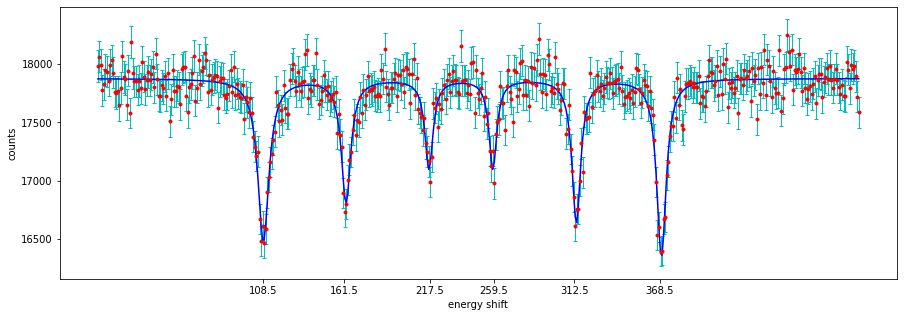

In [74]:
paras = more_lorentzian_fit(channels)

In [75]:
print(tabulate({'mean':paras[1:7],'half width':paras[7:13],'amplitude':paras[13:19]}, headers='keys'))

   mean    half width    amplitude
-------  ------------  -----------
108.545       8.89969    -19537.8
162.767       7.49278    -12478.4
217.136       6.49334     -7842.42
259.051       6.19158     -7466.98
313.779       6.96241    -13485.1
369.579       7.47774    -17993.1


In [104]:
paras[0]

17877.901193827416

# Error Propagation for Single Peak

In [134]:
def lorentzian_propagate(x, xerr, mu, gamma, amp, bg):
    return amp * (gamma*(mu-x)/ np.pi)/((x-mu)**2+(gamma/2)**2)**2

In [157]:
def single_lorentzian_error(i_peak):
    xdata = np.array(channels[i_peak-30:i_peak+30])
    ydata = np.array(counts[i_peak-30:i_peak+30])
    background = np.mean(counts)
    mean = sum(xdata * ydata) / sum(ydata)
    sdeviation = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    amplitude = min(ydata)-background

    # curve fit
    popt, pcov = curve_fit(guess_lorentzian, xdata, ydata, p0=[mean, sdeviation, amplitude, background])

    # plot
    plt.plot(xdata, guess_lorentzian(xdata, *popt), label='$\Gamma$ = '+str(popt[1]))
    #plt.plot(xdata, ydata,'+')
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata), fmt='.',ecolor = 'r', elinewidth = 1)#+(lorentzian_propagate(xdata, sdeviation, *popt))**2
    plt.show()

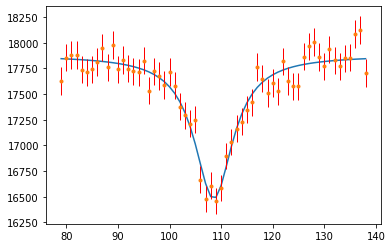

In [158]:
single_lorentzian_error(peak_channel_list[0])

# 400 $\mu s$ Data

In [84]:
dead_datapoints = pd.read_csv("400usdata0130.csv",header=19)
dead_counts = dead_datapoints['Counts'].tolist()
dead_channels = dead_datapoints['Channel'].tolist()

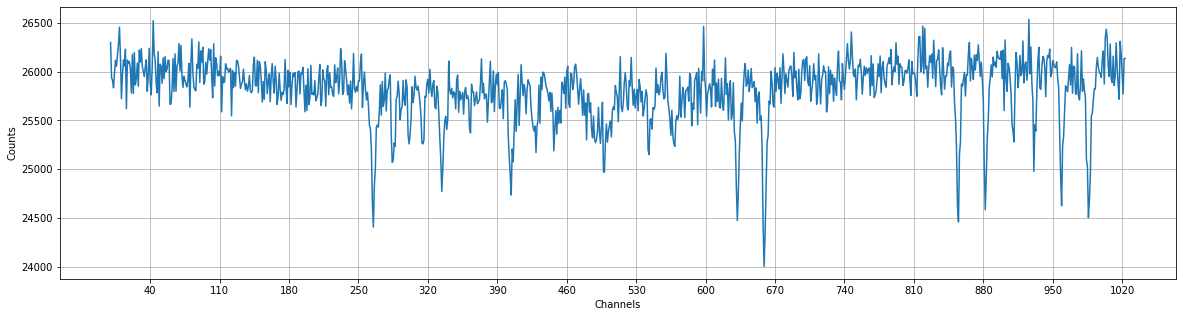

In [95]:
plt.figure(figsize=(20,5))
plt.plot(dead_channels, dead_counts,'-')
plt.ylabel('Counts')
plt.xlabel('Channels')
plt.grid()
plt.xticks(np.arange(40, 1024, step=70))
plt.show()